# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Proportional-Symbol-Maps-using-GeoPandas" data-toc-modified-id="Proportional-Symbol-Maps-using-GeoPandas-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Proportional Symbol Maps using GeoPandas</a></div><div class="lev1 toc-item"><a href="#Usage" data-toc-modified-id="Usage-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Usage</a></div><div class="lev1 toc-item"><a href="#Todo" data-toc-modified-id="Todo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Todo</a></div><div class="lev1 toc-item"><a href="#Examples" data-toc-modified-id="Examples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examples</a></div>

## Proportional Symbol Maps using GeoPandas

Copyright c) 2017 Daniel Lewis

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation filesthe "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and / or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, 
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, 
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

In [4]:
from __future__ import division, print_function

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
def prop_symbols(gdf, value_field, geom_field='geometry', symbol='circle', scale_factor=10, position='centroid',
                 edgecolors='k', facecolors='b', alpha=0.5):
    """Returns proportional symbols for a given GeoPandas GeoDataFrame value field as a Matplotlib PatchCollection

    Args:
        gdf (geopandas.geodataframe.GeoDataFrame): Input GeoDataFrame.
        value_field (str): Field name of values to be used to produce proportional symbols.
        geom_field (str, optional): Field name of geometry column in input GeoDataFrame, defaults to 'geometry'.
        symbol (str or int, optional): Name of proportional symbol to be created, defaults to 'circle', options available:
            'circle' - inputs accepted: 'circle' (case insensitive),'c','C', 1
            'triangle' - inputs accepted: 'triangle' (case insensitive),'t','T','Tri' (case insensitive),'3', 3
            'square' - inputs accepted: 'square' (case insensitive),'sq','s','S','4', 4
            'pentagon' - inputs accepted: 'pentagon' (case insensitive),'p','P','Pent' (case insensitive),'5', 5
            'hexagon' - inputs accepted: 'hexagon' (case insensitive),'h','H','hex' (case insensitive),'6', 6
            'heptagon' - inputs accepted: 'heptagon','septagon' (case insensitive),'hept' (case insensitive),'sept' (case insensitive),'7', 7
            'octagon' - inputs accepted: 'octagon' (case insensitive)','oct' (case insensitive),'8', 8
            'nonagon' - inputs accepted: 'nonagon' (case insensitive),'non' (case insensitive),'9', 9
            'decagon' - inputs accepted: 'decagon' (case insensitive),'dec' (case insensitive),'10',10
            'rhombus' - inputs accepted: 'rhombus' (case insensitive),'r','R'
            'lozenge' - inputs accepted: 'lozenge' (case insensitive),'l','L'
            'pentagram' - inputs accepted: 'pentagram' (case insensitive)
            'hexagram' - inputs accepted: 'hexagram' (case insensitive)
        scale_factor (numeric, optional): Arbitary Int or Float constant value to scale proportional symbols.
        position (str, optional): Center position of proportional symbols, defaults to centroid.
            'centroid' - GeoDataFrame centroid property, shape centroid.
            'center' - Centroid of GeoDataFrame envelope (bounding box) property, envelope centroid.
            'representative point' - Point returned by GeoDataFrame represntative point method, guarenteed to be inside polygon.
        edgepointlors (str, optional): Matplotlib color (defaults to black 'k')
        facecolors (str, optional): Matplotlib color (defaults to blue 'b')
        alpha (str, optional): Transparency (defaults to 0.5)

    Returns:
        Matplotlib PatchCollection of proportional Symbols
    """

    # Required matplotlib and numpy classes/functions for patch and collection
    # creation.
    from matplotlib.patches import Circle, RegularPolygon, Rectangle, Polygon
    from matplotlib.collections import PatchCollection
    from numpy import power, sin, tan, cos, pi

    # Calculate proportional symbol positions based on
    if position.lower() in ['centroid']:
        cents = gdf[geom_field].apply(
            lambda x: [x.centroid.x, x.centroid.y]).tolist()
    elif position.lower() == ['center', 'centre']:
        cents = gdf[geom_field].envelope.apply(
            lambda x: [x.centroid.x, x.centroid.y]).tolist()
    elif position.lower() in ['representative point', 'rep']:
        cents = gdf[geom_field].representative_point().apply(
            lambda x: [x.x, x.y]).tolist()
    else:
        # If position parameter not recognised, default to centroid.
        print("position parameter invalid, using 'centroid'. Options are 'centroid','center', or 'representative point'")
        cents = gdf[geom_field].apply(
            lambda x: [x.centroid.x, x.centroid.y]).tolist()

    symbol = str(symbol).lower()
    
    # Big if, elif, else statement to differentiate symbol choice.
    if symbol in ['circle', 'c', '1']:
        # Work out circular symbol radii
        radii = power(gdf[value_field] / pi, 0.5) * scale_factor
        # Create patches based on radii
        patches = [Circle(cents[i], radius=radii[i])
                   for i in range(len(radii))]

    elif symbol in ['triangle', 't', 'tri', '3']:
        # Work out (equilateral) triangle radius (circumradius)
        radii = power((gdf[value_field] * 12.0) /
                      (9.0 * power(3.0, 0.5)), 0.5) * scale_factor
        # Create patches based on radii
        patches = [RegularPolygon(cents[i], 3, radius=radii[i])
                   for i in range(len(radii))]

    elif symbol in ['square', 'sq', 's', '4']:
        # Work out square symbol side lengths
        side = power(gdf[value_field], 0.5) * scale_factor
        # Create patches based on side length
        patches = [Rectangle((cents[i][0] - side[i] / 2.0, cents[i][1] -
                              side[i] / 2.0), side[i], side[i]) 
                   for i in range(len(side))]

    elif symbol in ['pentagon', 'p', 'pent', '5']:
        # work out pentagon radius
        radii = power(
            (4.0 * tan(pi / 5.0) * gdf[value_field]) /
            5.0, 0.5) / (2.0 * sin(pi / 5.0)) * scale_factor
        # Create patches based on radii
        patches = [RegularPolygon(cents[i], 5, radius=radii[i])
                   for i in range(len(radii))]

    elif symbol in ['hexagon', 'h', 'hex','6']:
        # work out hexagon radius
        radii = power(
            (4.0 * tan(pi / 6.0) * gdf[value_field]) /
            6.0, 0.5) / (2.0 * sin(pi / 6.0)) * scale_factor
        # Create patches based on radii
        patches = [RegularPolygon(cents[i], 6, radius=radii[i])
                   for i in range(len(radii))]

    elif symbol in ['heptagon', 'septagon', 'hept', 'sept', '7']:
        # work out heptagon/septagon radius
        radii = power(
            (4.0 * tan(pi / 7.0) * gdf[value_field]) /
            7.0, 0.5) / (2.0 * sin(pi / 7.0)) * scale_factor
        # Create patches based on radii
        patches = [RegularPolygon(cents[i], 7, radius=radii[i])
                   for i in range(len(radii))]

    # NB decided not to allow 'o' as often denotes a circle
    elif symbol in ['octagon', 'oct', '8']:
        # work out octogon radius
        radii = power(
            (4.0 * tan(pi / 8.0) * gdf[value_field]) /
            8.0, 0.5) / (2.0 * sin(pi / 8.0)) * scale_factor
        # Create patches based on radii
        patches = [RegularPolygon(cents[i], 8, radius=radii[i])
                   for i in range(len(radii))]

    elif symbol in ['nonagon', 'non', '9']:
        # work out nonagon radius
        radii = power(
            (4.0 * tan(pi / 9.0) * gdf[value_field]) /
            9.0, 0.5) / (2.0 * sin(pi / 9.0)) * scale_factor
        # Create patches based on radii
        patches = [RegularPolygon(cents[i], 9, radius=radii[i])
                   for i in range(len(radii))]

    elif symbol in ['decagon', 'dec', '10']:
        # work out decagon radius
        radii = power((4.0 * tan(pi / 10.0) * gdf[value_field]) / 10.0, 0.5) / (
            2.0 * sin(pi / 10.0)) * scale_factor
        # Create patches based on radii
        patches = [RegularPolygon(cents[i], 10, radius=radii[i])
                   for i in range(len(radii))]

    elif symbol in ['rhombus', 'r']:
        # Assume diagonals are equal - is this technically a rhombus?
        radii = power(gdf[value_field] / 2.0, 0.5) * scale_factor
        # Create patches based on radii length
        patches = [RegularPolygon(cents[i], 4, radius=radii[i])
                   for i in range(len(radii))]

    elif symbol in ['lozenge', 'l']:
        # Assume acute angle is 30 degrees
        diag1 = power((2.0 * gdf[value_field]) / (power(3, 0.5) / 3.0), 0.5)
        diag2 = diag1 * (power(3, 0.5) / 3.0)
        diag1 = diag1 * scale_factor
        diag2 = diag2 * scale_factor
        xy = [[[cents[i][0] - diag2[i] / 2.0, cents[i][1]],
               [cents[i][0], cents[i][1] + diag1[i] / 2.0], 
               [cents[i][0] + diag2[i] / 2.0, cents[i][1]], 
               [cents[i][0], cents[i][1] - diag1[i] / 2.0]] for i in range(len(diag1))]
        # Create patches
        patches = [Polygon(xy[i]) for i in range(len(xy))]

    elif symbol in ['pentagram']:
        rad = power(gdf[value_field] /
                    ((10.0 * tan(pi / 10.0)) /
                     (3.0 - power(pi / 10.0, 2.0))), 0.5)
        h = 2.0 * ((gdf[value_field] / 10.0) / rad)
        s = h / sin(18.0 * pi / 180.0)
        rad *= scale_factor
        h *= scale_factor
        s *= scale_factor
        # Manually figure out vertex positions.
        xy = []
        for j in range(len(rad)):
            v0 = [cents[j][0], cents[j][1] + rad[j]]
            v1 = [cents[j][0] + h[j], cents[j]
                  [1] + h[j] / tan(36.0 * pi / 180.0)]
            v2 = [cents[j][0] + h[j] + s[j], cents[j]
                  [1] + h[j] / tan(36.0 * pi / 180.0)]
            v3 = [v2[0] - s[j] * sin(54.0 * pi / 180.0),
                  v2[1] - s[j] * cos(54.0 * pi / 180.0)]
            v4 = [cents[j][0] + rad[j] * sin(36.0 * pi / 180.0),
                  cents[j][1] - rad[j] * cos(36.0 * pi / 180.0)]
            v5 = [cents[j][0], cents[j][1] - h[j] / sin(36.0 * pi / 180.0)]
            v6 = [cents[j][0] - rad[j] * sin(36.0 * pi / 180.0),
                  cents[j][1] - rad[j] * cos(36.0 * pi / 180.0)]
            v8 = [cents[j][0] - h[j] - s[j], cents[j]
                  [1] + h[j] / tan(36.0 * pi / 180.0)]
            v7 = [v8[0] + s[j] * sin(54.0 * pi / 180.0),
                  v8[1] - s[j] * cos(54.0 * pi / 180.0)]
            v9 = [cents[j][0] - h[j], cents[j]
                  [1] + h[j] / tan(36.0 * pi / 180.0)]
            xy.append([v0, v1, v2, v3, v4, v5, v6, v7, v8, v9, v0])
        patches = [Polygon(xy[i]) for i in range(len(xy))]

    elif symbol in ['hexagram']:
        s = power(gdf[value_field] / 3.0 * power(3, 0.5), 0.5)
        h = 2.0 * power(0.75 * power(s, 2), 0.5)
        s *= scale_factor
        h *= scale_factor
        # Manually figure out vertex positions
        xy = []
        for j in range(len(s)):
            v0 = [cents[j][0], cents[j][1] + h[j]]
            v1 = [cents[j][0] + s[j] / 2.0, cents[j][1] + h[j] / 2.0]
            v2 = [cents[j][0] + 1.5 * s[j], cents[j][1] + h[j] / 2.0]
            v3 = [cents[j][0] + s[j], cents[j][1]]
            v4 = [cents[j][0] + 1.5 * s[j], cents[j][1] - h[j] / 2.0]
            v5 = [cents[j][0] + s[j] / 2.0, cents[j][1] - h[j] / 2.0]
            v6 = [cents[j][0], cents[j][1] - h[j]]
            v7 = [cents[j][0] - s[j] / 2.0, cents[j][1] - h[j] / 2.0]
            v8 = [cents[j][0] - 1.5 * s[j], cents[j][1] - h[j] / 2.0]
            v9 = [cents[j][0] - s[j], cents[j][1]]
            v10 = [cents[j][0] - 1.5 * s[j], cents[j][1] + h[j] / 2.0]
            v11 = [cents[j][0] - s[j] / 2.0, cents[j][1] + h[j] / 2.0]
            xy.append([v0, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v0])
        patches = [Polygon(xy[i]) for i in range(len(xy))]

    else:
        print("symbol parameter invalid, using 'circle', use help(prop_symbols) for all options")
        # Work out circular symbol radii
        radii = (power(gdf[value_field] / pi, 0.5) * scale_factor).tolist()
        # Create patches based on radii
        patches = [Circle(cents[i], radius=radii[i])
                   for i in range(len(radii))]

    return PatchCollection(
        patches, zorder=10, edgecolors=edgecolors, facecolors=facecolors, alpha=alpha)


# Usage

The basic function accepts a GeoPandas GeoDataFrame and the column name of the field for which you want to create proportional symbols. There are a number of different symbols to choose from, with circles set as the default. You can also adjust the position of the points on which the symbols are centered, although the 'centroid' default should be fine for most applications.

The scale_factor parameter is important, because the initial size of the symbols is arbitrarily defined. The scale_factor adjusts the symbols to suit the visual preferences of users. scale_factor < 1 makes the symbols smaller, scale_factor > 1 makes them larger. The scale_factor you need will depend on both the magnitudes of values being represented, and the geography in question. Setting the scale_factor is largely a question of trial - and - error and the 'best' scale_factor for a given map is a question of personal preference.

As GeoPandas map plotting is based on matplotlib, the process of plotting a proportional symbols map is as simple as creating a plot, plotting the original map as a base map, and then plotting the PatchCollection returned from the prop_symbols function using matplotlib's 'add_collection' method.

NB The field for which proportional symbols are to be created should contain values which are positive and greater than zero. It is important that the input data be in a projectedCartesian) coordinate system. The GeoDataFrame should be structured so that 1 row is 1 record.

# Todo

1. Figure legends.
2. Classified proportional symbols.

# Examples

In [ ]:
# Read in London Boroughs geojson and project to British National Grid.
ldn_boro = gpd.read_file('LDN_Boro.geojson').to_crs(epsg=27700)

# Get some population data for London Boroughs
ldn_pop = pd.read_excel('Pandas_Lon_Pop.xlsx')



# Merge the population data with the geospatial data
ldn_boro = ldn_boro.merge(ldn_pop, how='left', left_on='GSS_CODE', right_on='New Code')

In [ ]:
# Plot symbols on map
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(16, 16))

# ax1
circles = prop_symbols(ldn_boro, 2015, 'geometry', 'circle', 8)
ldn_boro.plot(color='w', ax=ax1, zorder=0)
ax1.add_collection(circles)
ax1.axis('equal')

# ax2
squares = prop_symbols(ldn_boro, 2015, 'geometry', 'square', 8)
ldn_boro.plot(color='w', ax=ax2, zorder=0)
ax2.add_collection(squares)
ax2.axis('equal')

# ax3
triangles = prop_symbols(ldn_boro, 2015, 'geometry', 'triangle', 8)
ldn_boro.plot(color='w', ax=ax3, zorder=0)
ax3.add_collection(triangles)
ax3.axis('equal')

# ax4
hexagons = prop_symbols(ldn_boro, 2015, 'geometry', 'hexagon', 8)
ldn_boro.plot(color='w', ax=ax4, zorder=0)
ax4.add_collection(hexagons)
ax4.axis('equal')

# ax5
octagons = prop_symbols(ldn_boro, 2015, 'geometry', 'octagon', 8)
ldn_boro.plot(color='w', ax=ax5, zorder=0)
ax5.add_collection(octagons)
ax5.axis('equal')

# ax6
rhombuses = prop_symbols(ldn_boro, 2015, 'geometry', 'rhombus', 6)
ldn_boro.plot(color='w', ax=ax6, zorder=0)
ax6.add_collection(rhombuses)
ax6.axis('equal')

# ax7
lozenges = prop_symbols(ldn_boro, 2015, 'geometry', 'lozenge', 6)
ldn_boro.plot(color='w', ax=ax7, zorder=0)
ax7.add_collection(lozenges)
ax7.axis('equal')

# ax8
pentagrams = prop_symbols(ldn_boro, 2015, 'geometry', 'pentagram', 6)
ldn_boro.plot(color='w', ax=ax8, zorder=0)
ax8.add_collection(pentagrams)
ax8.axis('equal')

# ax9
hexagrams = prop_symbols(ldn_boro, 2015, 'geometry', 'hexagram', 4)
ldn_boro.plot(color='w', ax=ax9, zorder=0)
ax9.add_collection(hexagrams)
ax9.axis('equal')

# plt.savefig('LDN_prop_symbols.png', dpi=300)

In [7]:
# Load states data
usstate = gpd.read_file(r'cb_2016_us_state_20m.shp')
# Just take continental US and project to NAD83 Contiguous US Albers.
usstate = usstate[~usstate['STUSPS'].isin(['AK', 'HI', 'AS', 'PR',
                                           'GU', 'MP', 'VI'])].to_crs({'init': 'epsg:5070'})
# Read in state populations
state_pop = pd.read_excel('Pandas_US_Pop.xlsx', skiprows=3)

# Merge the data
## FEDHACK
state_pop = state_pop.rename(columns={'Population': 2015})
usstate = usstate.merge(state_pop, how='left', left_on='NAME', right_on='Name')
## original
# usstate = usstate.merge(state_pop, how='left', left_on='STUSPS', right_on='Code')

(-2586827.1520878859,
 2488867.8500893554,
 123807.8259424709,
 3310574.6893768176)

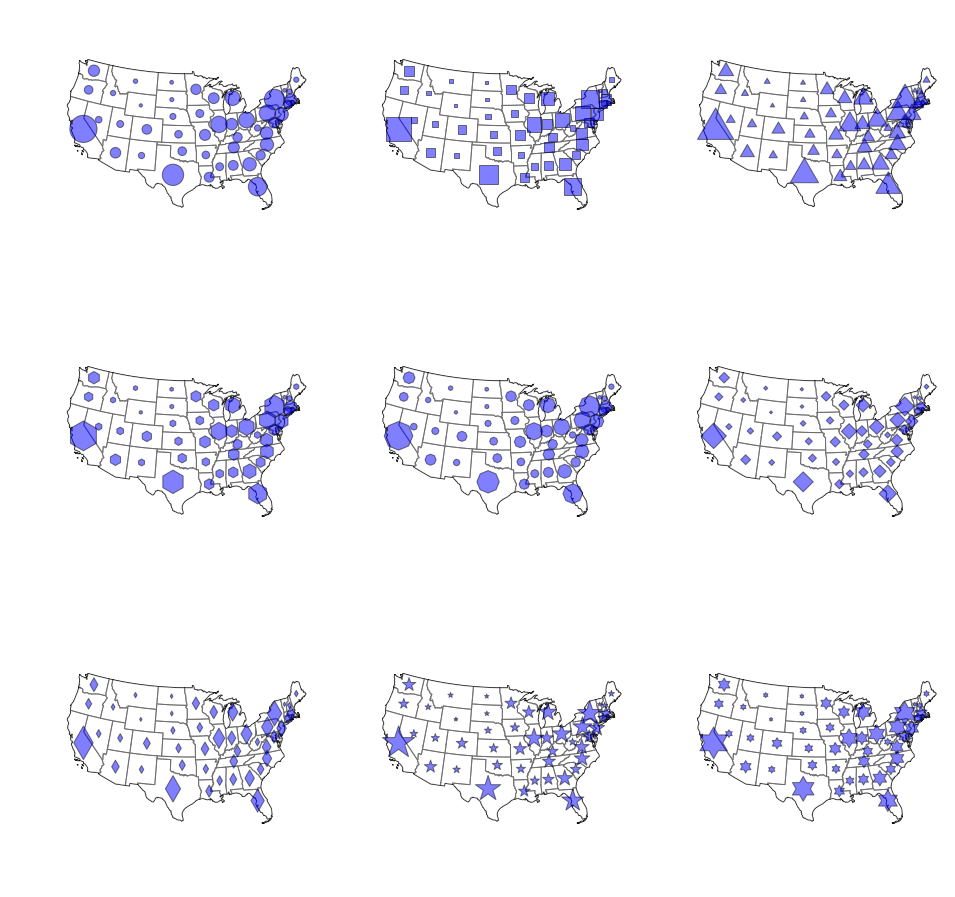

In [8]:
# Plot symbols on map
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(16, 16))

# ax1
circles = prop_symbols(usstate, 2015, 'geometry', 'circle', 80)
usstate.plot(color='w', ax=ax1, zorder=0)
ax1.add_collection(circles)
ax1.axis('equal')
ax1.axis('off')

# ax2
squares = prop_symbols(usstate, 2015, 'geometry', 'square', 80)
usstate.plot(color='w', ax=ax2, zorder=0)
ax2.add_collection(squares)
ax2.axis('equal')
ax2.axis('off')

# ax3
triangles = prop_symbols(usstate, 2015, 'geometry', 'triangle', 80)
usstate.plot(color='w', ax=ax3, zorder=0)
ax3.add_collection(triangles)
ax3.axis('equal')
ax3.axis('off')

# ax4
hexagons = prop_symbols(usstate, 2015, 'geometry', 'hexagon', 80)
usstate.plot(color='w', ax=ax4, zorder=0)
ax4.add_collection(hexagons)
ax4.axis('equal')
ax4.axis('off')

# ax5
octagons = prop_symbols(usstate, 2015, 'geometry', 'octagon', 80)
usstate.plot(color='w', ax=ax5, zorder=0)
ax5.add_collection(octagons)
ax5.axis('equal')
ax5.axis('off')

# ax6
rhombuses = prop_symbols(usstate, 2015, 'geometry', 'rhombus', 60)
usstate.plot(color='w', ax=ax6, zorder=0)
ax6.add_collection(rhombuses)
ax6.axis('equal')
ax6.axis('off')

# ax7
lozenges = prop_symbols(usstate, 2015, 'geometry', 'lozenge', 60)
usstate.plot(color='w', ax=ax7, zorder=0)
ax7.add_collection(lozenges)
ax7.axis('equal')
ax7.axis('off')

# ax8
pentagrams = prop_symbols(usstate, 2015, 'geometry', 'pentagram', 60)
usstate.plot(color='w', ax=ax8, zorder=0)
ax8.add_collection(pentagrams)
ax8.axis('equal')
ax8.axis('off')

# ax9
hexagrams = prop_symbols(usstate, 2015, 'geometry', 'hexagram', 40)
usstate.plot(color='w', ax=ax9, zorder=0)
ax9.add_collection(hexagrams)
ax9.axis('equal')
ax9.axis('off')

# plt.savefig('LDN_prop_symbols.png', dpi=300)